# Module 2 Homework

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


Preparing the dataset

Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [3]:
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_prep = df[columns]
df_prep.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


EDA

Look at the fuel_efficiency_mpg variable. Does it have a long tail? - **No**

In [4]:
df_prep.fuel_efficiency_mpg.describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

<Axes: ylabel='Frequency'>

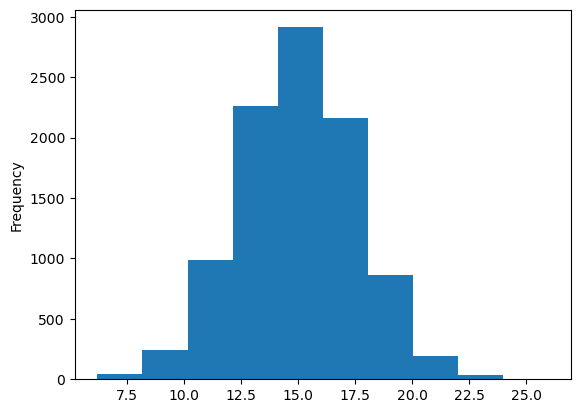

In [5]:
df_prep.fuel_efficiency_mpg.plot(kind="hist")

### Question 1

There's one column with missing values. What is it? - **horsepower**

In [6]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [7]:
df_prep.isna().any()

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

### Question 2

What's the median (50% percentile) for variable 'horsepower'? - **149.0**

In [8]:
df_prep.horsepower.median()

149.0

Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use the same code as in the lectures

In [9]:
np.random.seed(42)

In [10]:
n = len(df_prep)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_train+n_val+n_test

(9704, 9704)

In [11]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703])

In [12]:
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [13]:
df_train = df_prep.iloc[idx[:n_train]]
df_val = df_prep.iloc[idx[n_train:n_train + n_val]]
df_test = df_prep.iloc[idx[n_train + n_val:]]

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [16]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [17]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?


**With mean: 0.46 (vs 0.51 with 0)**

In [18]:
# Functions for Linear Regression and RMSE

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [19]:
# Linear Regression and RMSE train data - fill NA with 0

df_train_zero = df_train.fillna(0)
w_0, w = train_linear_regression(df_train_zero, y_train)
y_pred = w_0 + df_train_zero.dot(w)
rmse(y_train, y_pred)


0.5202614265099076

In [20]:
# Linear Regression and RMSE val data - fill NA with 0

df_val_zero = df_val.fillna(0)
y_pred = w_0 + df_val_zero.dot(w)
round(rmse(y_val, y_pred), 2)


0.52

In [21]:
# Linear Regression and RMSE train data - fill NA with mean

horsepower_mean = df_train.horsepower.mean()
df_train_mean = df_train.fillna(horsepower_mean)
w_0, w = train_linear_regression(df_train_mean, y_train)
y_pred = w_0 + df_train_mean.dot(w)
rmse(y_train, y_pred)


0.46244121379599645

In [22]:
# Linear Regression and RMSE train data - fill NA with mean

df_val_mean = df_val.fillna(horsepower_mean)
y_pred = w_0 + df_val_mean.dot(w)
round(rmse(y_val, y_pred), 2)

0.46

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If multiple options give the same best RMSE, select the smallest r.

When rounded, **0** and 0.01/0.1 give the same RMSE: 0.5

In [23]:
# Linear Regression Function with Regularization

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(df_train_zero, y_train, r=r)
    y_pred = w_0 + df_val_mean.dot(w)
    print(f"{r}: {round(rmse(y_val, y_pred), 2)}")

0: 0.5
0.01: 0.5
0.1: 0.5
1: 0.51
5: 0.51
10: 0.51
100: 0.51


### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

**0.007 (or 0.006989446426344896)**

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [25]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for s in seeds:
    np.random.seed(s)
    
    n = len(df_prep)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df_prep.iloc[idx[:n_train]]
    df_val = df_prep.iloc[idx[n_train:n_train + n_val]]
    df_test = df_prep.iloc[idx[n_train + n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
   
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    df_train_zero = df_train.fillna(0)
    w_0, w = train_linear_regression(df_train_zero, y_train)
    df_val_zero = df_val.fillna(0)
    y_pred = w_0 + df_val_zero.dot(w)
    scores.append(rmse(y_val, y_pred))




In [26]:
scores

[0.5206531296263988,
 0.5213388912862129,
 0.5228069974646676,
 0.5159516741272678,
 0.5109129460100481,
 0.5283406460150374,
 0.5313910658199212,
 0.5090670387337807,
 0.5147399129384682,
 0.5131865908366466]

In [27]:
round(np.std(scores), 5)

0.00699

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

**0.515**

In [28]:
np.random.seed(9)

n = len(df_prep)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df_prep.iloc[idx[:n_train]]
df_val = df_prep.iloc[idx[n_train:n_train + n_val]]
df_test = df_prep.iloc[idx[n_train + n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [29]:
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])


In [30]:
X_full_train = df_full_train.fillna(0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [31]:
X_test = df_test.fillna(0)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
    
print("rmse: ", round(score, 4))

rmse:  0.5156
